In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import datasets

# import graphviz
# from yellowbrick.classifier import ConfusionMatrix # não vou usar yellowbrick

In [64]:
# contem só os algoritmos usados
from sklearn.naive_bayes import GaussianNB

# from sklearn.tree import DecisionTreeClassifier

# from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans ,AgglomerativeClustering, DBSCAN


# não vai ser testado
# from mlxtend.frequent_patterns import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association


In [ ]:
# DESINSTALAR AO FINAL DO CURSO

# mlxtend
# graphviz

## Seção 3 - Estudos de Algoritmos de Machine Learning

### Regressão Linear

#### Regressão Linear (calculado)

In [ ]:
####

#### Regressão linar Statsmodels

### IMPORT

In [ ]:
df = pd.read_csv('.\\data\\insurance.csv')
df.head()

In [5]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
# df.head()

In [ ]:
df.shape

In [7]:
# Divide em variáveis dependentes e independentes
y = df['Accident'] # Variável dependente
x = df.drop(columns=['Accident'], axis=1) # Variáveis independentes

In [8]:
# Aplica o LabelEncoder para transformar as variáveis categóricas em numéricas
label_encoder = LabelEncoder() # Instancia o LabelEncoder

x = x.apply(label_encoder.fit_transform) # Aplica o LabelEncoder em todas as colunas
y = label_encoder.fit_transform(y) # Aplica o LabelEncoder na variável dependente

In [9]:
# transforma em array para poder passar para o modelo
x = np.array(x)
y = np.array(y)

In [10]:
# Divide em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

### 1) Naive Bayes

In [ ]:
# instacia o modelo e aplica o treinamento considerando os dados de treino
modelo = GaussianNB()
modelo.fit(x_treino, y_treino) # a função fit treina o modelo

In [154]:
# Aplica o modelo treinado para fazer a predição
resultado = modelo.predict(x_teste) # a função predict faz a predição

In [155]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida) 
precision = precision_score(y_teste, resultado, average='weighted')
recall = recall_score(y_teste, resultado, average='weighted')
f1 = f1_score(y_teste, resultado, average='weighted')

In [ ]:
print(f'Acuracia : {acuracia :.2f} \nPrecision: {precision:.2f} \nRecall: {recall :.2f} \nF1-Score: {f1 :.2f}' )


In [ ]:
report = classification_report(y_teste, resultado)
print(report) 
#macro avg: média simples da coluna de cima

In [ ]:
matrisc = confusion_matrix(y_teste, resultado)

#  no_reducion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrisc, annot=True, fmt='d', cmap='magma', cbar=False, )
plt.title('GaussianNB - Matriz de Confusão ')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Decision Tree 

In [ ]:
modelo = DecisionTreeClassifier(random_state=1)
modelo.fit(x_treino, y_treino)

In [171]:
# Aplica o modelo treinado para fazer a predição
resultado = modelo.predict(x_teste) # a função predict faz a predição

In [172]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida) 
precision = precision_score(y_teste, resultado, average='weighted')
recall = recall_score(y_teste, resultado, average='weighted')
f1 = f1_score(y_teste, resultado, average='weighted')

In [ ]:
print(f'Acuracia : {acuracia :.2f} \nPrecision: {precision:.2f} \nRecall: {recall :.2f} \nF1-Score: {f1 :.2f}' )


In [ ]:
report = classification_report(y_teste, resultado)
print(report) 
#macro avg: média simples da coluna de cima

In [ ]:
data = export_graphviz(modelo, out_file=None, feature_names=df.columns[:-1], class_names=True, rounded=True)
graph = graphviz.Source(data)
graph.render('decision_tree_graphivz', format = 'png')

### Random Forest

In [ ]:
# rodar primeiro e deixar salvo os resultados
# modelo = RandomForestClassifier(random_state=1, n_estimators=500) 

# rodar depois do primeiro e compara os resultados
modelo = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=8, max_leaf_nodes=8)
modelo.fit(x_treino, y_treino)

In [134]:
resultado = modelo.predict(x_teste)

In [135]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida) 
precision = precision_score(y_teste, resultado, average='weighted')
recall = recall_score(y_teste, resultado, average='weighted')
f1 = f1_score(y_teste, resultado, average='weighted')
print(f'Acuracia : {acuracia :.2f} \nPrecision: {precision:.2f} \nRecall: {recall :.2f} \nF1-Score: {f1 :.2f}' )

In [ ]:
# visualizar a arvore de decisão
tree_index = 0
visualizacao_tree = modelo.estimators_[tree_index]


In [ ]:
plt.figure(figsize=(20,10))
plot_tree(visualizacao_tree, filled=True,feature_names=df.columns[:-1], rounded=True )
plt.show()

* Classificação baseda em instancia.
### KNN-neighborns

In [3]:
df = pd.read_csv('.\\data\\mt_cars.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
y = df['cyl'].values
x = df[['mpg','hp']].values

In [5]:
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [7]:
resultado = modelo.predict(x)
resultado

array([6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8,
       8, 8, 8, 4, 4, 4, 8, 8, 8, 6])

In [9]:
acuracia = accuracy_score(y, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida)
print(f'Acuracia : {acuracia :.2f}')
precision = precision_score(y, resultado, average='weighted')
print(f'Precision: {precision:.2f}')
recall = recall_score(y, resultado, average='weighted')
print(f'Precision: {recall:.2f}')
f1 = f1_score(y, resultado, average='weighted')
print(f'F1-Score: {f1:.2f}')

Acuracia : 0.94
Precision: 0.94
Precision: 0.94
F1-Score: 0.94


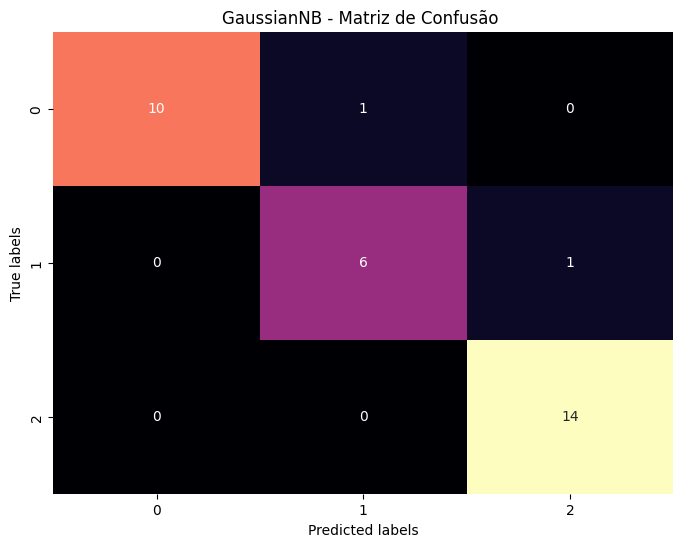

In [10]:
matrisc = confusion_matrix(y, resultado)

#  no_reducion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrisc, annot=True, fmt='d', cmap='magma', cbar=False, )
plt.title('KNN- Matriz de Confusão ')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
ne

### K-means
* Agrupamento ou Clusterização

Primeiro, define-se o número de clusters. Em seguida, o algoritmo determina os centros de cada cluster. Após isso, calcula-se a distância de cada ponto até o centróide. Com todas as distâncias calculadas, é feita a média das distâncias para todos os grupos. O algoritmo continua a rodar até que os pontos não mudem mais de posição ou até atingir um critério de parada específico.

In [38]:
# df = pd.read_csv('.\\data\\iris.csv')
df = datasets.load_iris()
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
def plot_clusters(data, labels, title):
  colors = ['red','green','purple','black']
  plt.figure(figsize=(8,4))
  for i,c,l in zip(range(-1,3), colors, ['Noise','Setosa','Versicolor','Virginica']):
    if i == -1:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c=colors[i], label = l, alpha=0.5, s=50, marker='x')
    else:
      plt.scatter(data[labels == i, 0], data[labels == i, 3], c=colors[i], label = l, alpha=0.5, s=50)
  plt.legend()
  plt.title(title)
  plt.xlabel('Comprimento Sépala')
  plt.ylabel("Largura da Pétala")
  plt.show()

In [30]:
kmeans = KMeans(n_clusters=3,n_init='auto') # parametro mais importante é o n_clusters
kmeans.fit(df.data)
print(kmeans.labels_)
resultados = confusion_matrix(df.target, kmeans.labels_)
print(resultados)

# plot_clusters(df.data, kmeans.labels_, 'Cluster KMeans')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


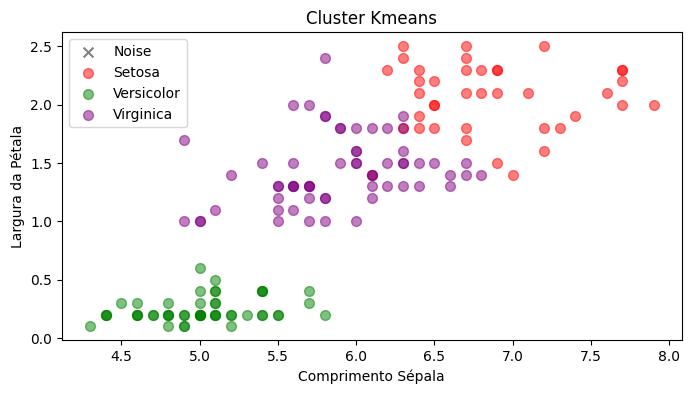

In [31]:
plot_clusters(df.data, kmeans.labels_ ,'Cluster Kmeans')

In [25]:
# DBSCAN é um outro algoritmo de clusterização, ele difere do KMeans por não precisar definir o número de clusters, porem ele pode gerar ruindo se os dados não forem bem tratados
dbscan = DBSCAN(eps=0.5, min_samples=5) # eps = raio de vizinhança, min_samples = número mínimo de pontos para formar um cluster
dbscan_resultado = dbscan.fit_predict(df.data)
print(dbscan_resultado)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


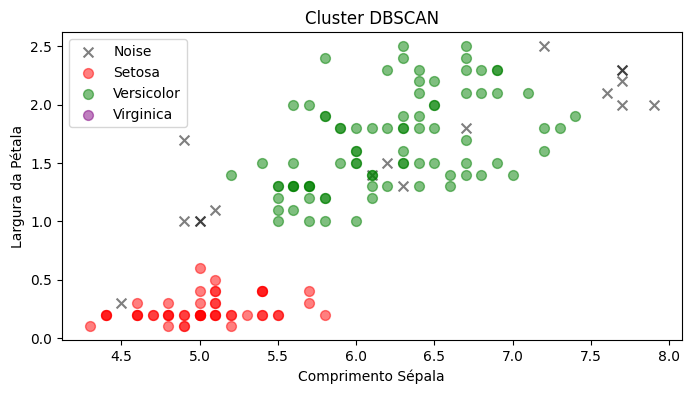

In [32]:
plot_clusters(df.data, dbscan_resultado, 'Cluster DBSCAN')

In [39]:
# clusterização aglomerativa (Hierárquica)
aglo = AgglomerativeClustering(n_clusters=3)
aglo_resultado = aglo.fit_predict(df.data)
print(aglo_resultado)
aglo_resultado = confusion_matrix(df.target, aglo_resultado)
print(aglo_resultado)

# agglo = AgglomerativeClustering(n_clusters=3)
# agglo_labels = agglo.fit_predict(iris.data)
# print(agglo_labels)
# resultados = confusion_matrix(iris.target,agglo_labels)
# print(resultados)
# plot_clusters(iris.data,agglo_labels,'Cluster Hierárquico' )

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


In [ ]:
plot_clusters(df.data, aglo_resultado, 'Cluster Aglomerativo')

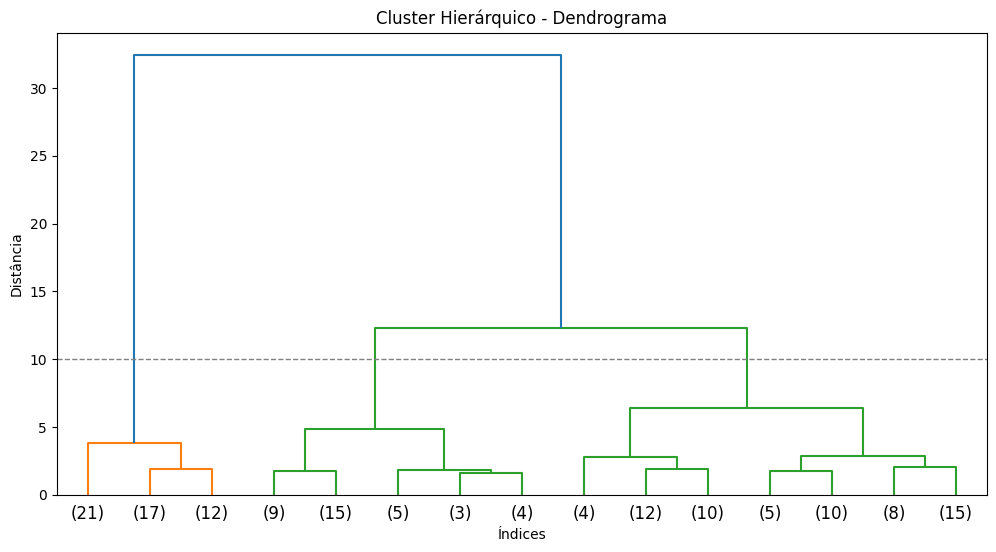

In [35]:
plt.figure(figsize=(12,6))
plt.title('Cluster Hierárquico - Dendrograma')
plt.xlabel('Índices')
plt.ylabel('Distância')
linkage_matrix = linkage(df.data, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=15)
plt.axhline(y=10, c='gray', lw=1, linestyle='dashed')
plt.show()

## Seção 4


In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Engenharia de atributos

In [42]:
#
df = pd.read_csv('.\\data\\credit_simple.csv', sep=';')
df.head()

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO,CLASSE
0,1169.0,4,67,nenhum,01/01/2019,masculino solteiro,radio/tv,bom
1,5951.0,2,22,nenhum,01/01/2020,fem div/cas,radio/tv,ruim
2,2096.0,3,49,nenhum,02/01/2020,masculino solteiro,educação,bom
3,7882.0,4,45,nenhum,02/01/2019,masculino solteiro,mobilia/equipamento,bom
4,4870.0,4,53,nenhum,03/01/2018,masculino solteiro,carro novo,ruim


In [43]:
y = df['CLASSE']
x = df.drop(columns=['CLASSE'], axis=1)

* Preenchendo valores nulos

In [44]:
x.isnull().sum()

SALDO_ATUAL         7
RESIDENCIADESDE     0
IDADE               0
OUTROSPLANOSPGTO    0
DATA                0
ESTADOCIVIL         8
PROPOSITO           0
dtype: int64

In [46]:
# Subistitui os valores NAN da coluna SALDO_ATUAL pela média
mediana = x['SALDO_ATUAL'].median()
x['SALDO_ATUAL'] = x['SALDO_ATUAL'].fillna(mediana)
x.isnull().sum()

SALDO_ATUAL         0
RESIDENCIADESDE     0
IDADE               0
OUTROSPLANOSPGTO    0
DATA                0
ESTADOCIVIL         8
PROPOSITO           0
dtype: int64

In [51]:
# subistitui os valores NAN da coluna ESTADOCIVIL pela moda
# MODA: valor que mais se repete.
moda = x.groupby(['ESTADOCIVIL']).size()
moda

ESTADOCIVIL
fem div/cas               308
masculino casado/viuvo     92
masculino div/sep          50
masculino solteiro        542
dtype: int64

In [52]:
x['ESTADOCIVIL'] = x['ESTADOCIVIL'].fillna('masculino solteiro')

* Outliers

In [54]:
desvio = x['SALDO_ATUAL'].std()
print(desvio)

np.float64(685936688.9820067)

In [57]:
# print(mediana)
# mediana = x['SALDO_ATUAL'].median()
# print(mediana)
x.loc[x['SALDO_ATUAL'] >= 2*desvio, 'SALDO_ATUAL'] = mediana
x.loc[x['SALDO_ATUAL'] >= 2*desvio]

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO


* 1 - **SELEÇÃO DE ATRIBUTOS**


In [77]:
from sklearn.feature_selection import SelectKBest, chi2

In [78]:
df = pd.read_csv('.\\data\\ad.data',header=None)
df.head()
df.shape

(3279, 1559)

In [79]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [80]:
x

array([[125.    , 125.    ,   1.    , ...,   0.    ,   0.    ,   0.    ],
       [ 57.    , 468.    ,   8.2105, ...,   0.    ,   0.    ,   0.    ],
       [ 33.    , 230.    ,   6.9696, ...,   0.    ,   0.    ,   0.    ],
       ...,
       [ 23.    , 120.    ,   5.2173, ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [ 40.    ,  40.    ,   1.    , ...,   0.    ,   0.    ,   0.    ]])

In [81]:
y

array(['ad.', 'ad.', 'ad.', ..., 'nonad.', 'nonad.', 'nonad.'],
      dtype=object)

1.1 - **SELEÇÃO COM TODO O CONJUNTO DE ATRIBUTOS**

In [82]:
x_treino, x_teste, y_treino,y_teste = train_test_split(x,y ,test_size=0.3, random_state=0)

In [83]:
modelo = GaussianNB()
modelo.fit(x_treino, y_treino)
resultado = modelo.predict(x_teste)

In [84]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida) 
precision = precision_score(y_teste, resultado, average='weighted')
recall = recall_score(y_teste, resultado, average='weighted')
f1 = f1_score(y_teste, resultado, average='weighted')
print(f'Acuracia : {acuracia :.2f} \nPrecision: {precision:.2f} \nRecall: {recall :.2f} \nF1-Score: {f1 :.2f}' )

Acuracia : 0.78 
Precision: 0.90 
Recall: 0.78 
F1-Score: 0.81


1.2 - **SELEÇÃO COM UM SUBCONJUNTO O CONJUNTO DE ATRIBUTOS**

In [85]:
# faz a seleção de features (colunas) mais importantes com base no teste qui-quadrado
selecao = SelectKBest(chi2, k=7) # k = número de features que deseja manter
x_novo = selecao.fit_transform(x,y)

In [74]:
x_novo.shape


(3279, 7)

In [86]:
x_treino, x_teste, y_treino,y_teste = train_test_split(x_novo,y ,test_size=0.3, random_state=0)

In [87]:
modelo = GaussianNB()
modelo.fit(x_treino, y_treino)
resultado = modelo.predict(x_teste)

In [88]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, resultado) # a função accuracy_score compara y_teste e o resultado da predição (y_saida) 
precision = precision_score(y_teste, resultado, average='weighted')
recall = recall_score(y_teste, resultado, average='weighted')
f1 = f1_score(y_teste, resultado, average='weighted')
print(f'Acuracia : {acuracia :.2f} \nPrecision: {precision:.2f} \nRecall: {recall :.2f} \nF1-Score: {f1 :.2f}' )

Acuracia : 0.95 
Precision: 0.94 
Recall: 0.95 
F1-Score: 0.94


Houve melhora siginificativa no resultado apos seleção dos atributos.

**ANTES** -  (Acuracia : 0.78 - Precision: 0.90 - Recall: 0.78 -F1-Score: 0.81)

**DEPOIS** - (Acuracia : 0.95 - Precision: 0.94 -Recall: 0.95 - F1-Score: 0.94)

### Técnicas de Agruamento

In [110]:
from sklearn.preprocessing import scale
from hopkins import *
from metric import *
# from visual_assessment_of_tendency import *
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.cluster import KMeans

In [94]:
df = datasets.load_iris()
clust_1 = scale(df.data)
clust_2 = scale(np.random.rand(150,4))

In [95]:
clust_2

array([[-4.67419302e-01,  1.17486349e+00,  1.24824385e+00,
        -1.66906274e+00],
       [-1.11310542e+00,  5.97455850e-01,  1.54382536e+00,
        -3.35256964e-01],
       [-1.02023478e-02,  1.16023814e+00, -2.57710168e-01,
        -2.75335413e-01],
       [ 1.59157562e+00, -1.43351698e+00,  1.43733508e+00,
         1.41789232e+00],
       [ 8.24824367e-01, -7.78170223e-01, -1.59864244e+00,
        -9.53035121e-01],
       [ 9.74099413e-01, -6.52042330e-01, -5.57834140e-02,
         5.26859944e-01],
       [-1.52137263e+00,  4.68819392e-01, -4.08390901e-02,
         6.82309833e-01],
       [ 1.15739875e+00,  2.15369887e-01,  6.86867284e-01,
        -5.78868763e-01],
       [-1.73594423e+00, -5.27544801e-01,  5.61797472e-01,
        -1.53824388e+00],
       [ 7.75074370e-01, -1.02567449e+00,  9.96389170e-01,
        -4.42651885e-01],
       [ 1.05700474e+00, -1.27777870e+00,  1.51146638e+00,
         1.51756485e+00],
       [ 1.07936592e+00, -1.03547304e+00,  7.29368315e-01,
      

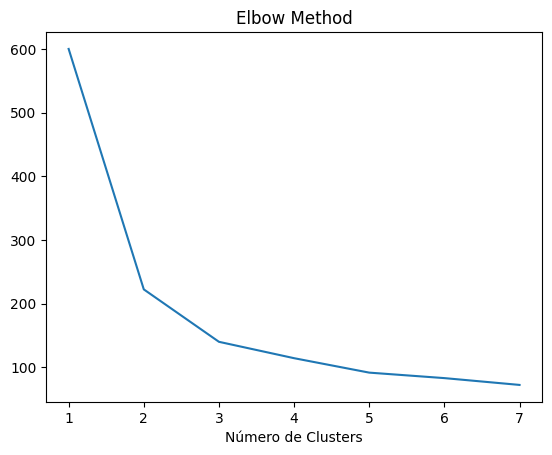

In [96]:
inertia = []
for i in range(1,8):
  modelo = KMeans(n_clusters=i, n_init='auto')
  modelo.fit(clust_1)
  inertia.append(modelo.inertia_)
plt.plot(range(1,8), inertia) #, marker='o'
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.show()

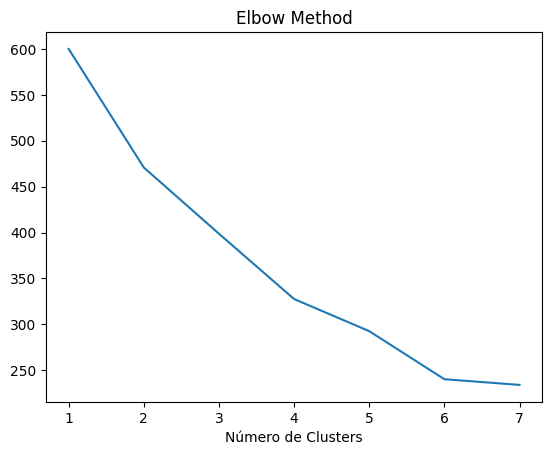

In [97]:
inertia = []
for i in range(1,8):
  modelo = KMeans(n_clusters=i, n_init='auto')
  modelo.fit(clust_2)
  inertia.append(modelo.inertia_)
plt.plot(range(1,8), inertia) #, marker='o'
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.show()

In [102]:
# a função hopkins retorna um valor entre 0 e 1, quanto mais próximo de 1, mais os dados são clusterizáveis
print(hopkins(clust_1, 150))
print(hopkins(clust_2, 150))

0.1863396503093524
0.4874145330968097


In [ ]:
# # vat(clust_1)
# # vat(clust_2)
# ivat(clust_1)
# ivat(clust_2)

Tecnica indica o numero ideal de clusters.

In [107]:
# retorna o numero de clustaers mais adequado
m = assess_tendency_by_metric(clust_1, 'silhouette',5)
print(m) # retornou 2 clusters
m = assess_tendency_by_metric(clust_1, 'davies_bouldin',5)
print(m) # retornou 2 clusters
m = assess_tendency_by_metric(clust_1, 'calinski_harabasz',5)
print(m) # retornou 2 clusters

(np.int64(2), array([0.58175005, 0.45663381, 0.38349421, 0.34871861]))
(np.int64(2), array([0.59331269, 0.83400015, 1.01558682, 0.92101962]))
(np.int64(2), array([251.34933946, 239.48453205, 206.55006422, 166.46516533]))


In [108]:
# retorna o numero de clustaers mais adequado
m = assess_tendency_by_metric(clust_2, 'silhouette',5)
print(m) # retornou 2 clusters
m = assess_tendency_by_metric(clust_2, 'davies_bouldin',5)
print(m) # retornou 2 clusters
m = assess_tendency_by_metric(clust_2, 'calinski_harabasz',5)
print(m) # retornou 2 clusters

(np.int64(5), array([0.18488874, 0.19341725, 0.20559186, 0.22244681]))
(np.int64(5), array([1.94523879, 1.52329002, 1.36138246, 1.33414658]))
(np.int64(4), array([34.62493843, 37.39840534, 43.23302841, 41.75520033]))


In [116]:
# Faz a média dos tres metodos e retornar o numero de clustaers mais adequado
m = assess_tendency_by_mean_metric_score(clust_1,5)
print('A média de cluster é:',m) # retornou 2 clusters
# retorna o numero de clustaers mais adequado
m = assess_tendency_by_mean_metric_score(clust_2,5)
print('A média de cluster é: ',m) # retornou 2 clusters


A média de cluster é: 2.0
A média de cluster é:  5.0


### Escolha do melhor metodo de clusterização

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [119]:
def compare_algorithms(X, max_clusters):
  results = []
  cluster_range = range(2, max_clusters +1)

  #kmeans
  for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    results.append(('KMeans',n_clusters,silhouette_avg))
  
  #agglomerativo
  for n_clusters in cluster_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agglomerative.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    results.append(('Agglomerative',n_clusters,silhouette_avg))

  #dbscan
  eps_values = np.arange(0.1,0.9,0.1)
  for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X)
    if len(set(clusters)) > 1:
      silhouette_avg = silhouette_score(X, clusters)
      results.append(('DBSCAN',eps,silhouette_avg))

  return results
     

In [122]:
df = datasets.load_iris()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.data)

resultado = compare_algorithms(scaled_data, 10)

resultado = pd.DataFrame(resultado, columns=['Agrupado','Clusters','Score'])
resultado

,Agrupado,Clusters,Score
0,KMeans,2.0,0.581750
1,KMeans,3.0,0.459948
2,KMeans,4.0,0.386941
3,KMeans,5.0,0.345511
4,KMeans,6.0,0.343719
5,KMeans,7.0,0.329236
6,KMeans,8.0,0.335194
7,KMeans,9.0,0.352488
8,KMeans,10.0,0.348607
9,Agglomerative,2.0,0.577035


In [126]:
resultado.loc[resultado['Score'].idxmax()]


Agrupado     KMeans
Clusters        2.0
Score       0.58175
Name: 0, dtype: object